# **Tarea 3, Parte 4: Numpy y Visualización [100 puntos]**

Esta tarea contribuye con el 50% de la evaluación global del curso. 

Visualización con Matplotlib

Elija algún ejemplo de las visualizaciones del material visto en el curso y adáptalo a los datos de un ejemplo obteniendo tus datos de sitios de repositorios como 
- https://archive.ics.uci.edu/ml/index.php, 
- https://datos.gob.mx/ 
- o similares 

y muestre la visualización.

In [40]:
import matplotlib.pyplot as plt



-Parte 1: Acceso a los datos

Se hace con la forma estandar de python de leer documentos dado que Pandas tiene problemas leyendo este xml en particular

In [41]:
x_data= []
y_data = []
names = []
ids = []
with open("places.xml",'r',encoding="utf8") as file:
    line = file.readline()
    line = file.readline()
    line = file.readline()
    while True:
        
        #Leer el id
        id = line[19:line.find('"',20)]
        #Leer el nombre
        line = file.readline()
        name = line[10: line.find('<',11)]
        #Leer coordenadas
        line = file.readline()
        line = file.readline()
        line = file.readline()
        if ("" == line):
            break
        x = float(line[9: line.find('<',10)])
        line = file.readline()
        y = float(line[9: line.find('<',10)])
        #Append data
        x_data.append(x)
        y_data.append(y)
        names.append(name)
        ids.append(id)
        line = file.readline()
        line = file.readline()
        line = file.readline()
#Confirmar que se leyereon correctamente minimo los primeros 10 datos para no saturar la consola
print(ids[:10])

['2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048']


-Parte 2: Limpiar los datos
Se quitaran todas aquellas coordenadas que no correspondan al territorio mexicano debido a la clara inconsistencia en la informacion

In [44]:
new_x = []
new_y = []
new_names = []
new_ids = []

for i in range(len(x_data)):
    if x_data[i] < -122.17027 or x_data[i] > -86.50189:
        continue
    elif y_data[i] < -84.64166 or y_data[i] > 32.71833:
        continue
    new_x.append(x_data[i])
    new_y.append(y_data[i])
    new_names.append(names[i])
    new_ids.append(ids[i])

x_data = new_x
y_data = new_y
names = new_names
ids = new_ids
        



-Parte 3: Demostracion grafica de los datos

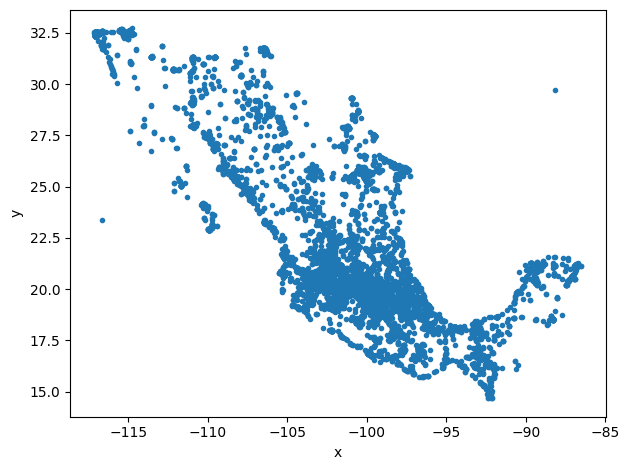

In [45]:
fig, ax = plt.subplots(dpi=100, figsize=(6.4, 4.8))

ax.plot(x_data, y_data, '.')
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.tight_layout()

plt.show()

-Parte 4: Reflexion
Estos datos que estoy usando fueron sacados de https://datos.gob.mx/ y es una lista de las actuales gasolinerias en Mexico con sus nombres y sus ubicaciones. Con esta informacion hice una grafica demostrando la distribucion de las gasolineras a lo largo del pais, para poder analizar donde se encuentran con mayor concentracion.
Se me hizo interesante la gran concentracion en la zona centro del pais y la menor concentracion en zona norte, seria interesante poder comparar esta grafica con un mapa de distribucion de poblacion para ver si realmente concuerdan